# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 10 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

Зафиксируем `seed` для воспроизводимости.

In [ ]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [ ]:
N = 1e4  # use this
# YOUR CODE GOES HERE
theta = 6
sample = sps.uniform(loc=0, scale=theta).rvs(size=int(N))

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [ ]:
# YOUR CODE GOES HERE
means = 2 * (np.cumsum(sample) / np.arange(1, N + 1))
mean_n_order =  (means + np.maximum.accumulate(sample)) / 2
first_order = np.minimum.accumulate(sample) * np.arange(2, N + 2)
first_n_order = np.minimum.accumulate(sample) + np.maximum.accumulate(sample)
n_order = (np.arange(2, N + 2) / np.arange(1, N + 1)) * np.maximum.accumulate(sample)

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

Text(0.5, 1.0, 'Зависимость ошибки различных оценок от размера выборки при $\\theta =$6')

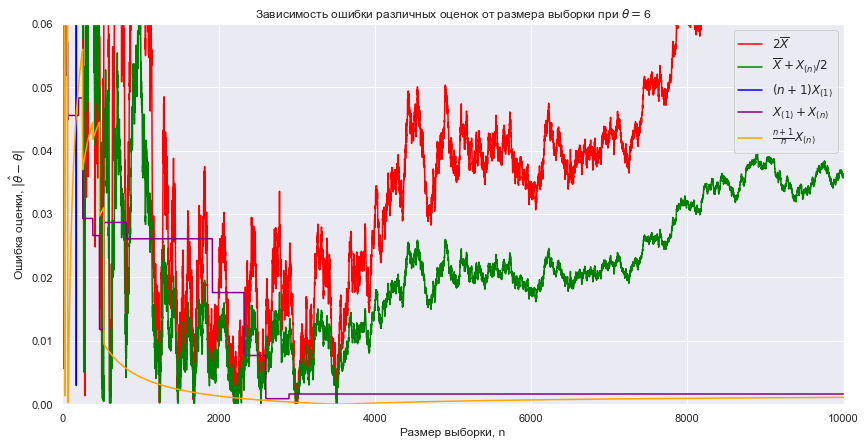

In [ ]:
# YOUR CODE GOES HERE
plt.figure(figsize=(14,7))
plt.ylim((None, 0.06))
plt.xlim(None, 10000)
plt.plot(np.abs(means - theta), color='red', label=r'$2\overline{X}$')
plt.plot(np.abs(mean_n_order - theta), color='green', label=r'$\overline{X} + X_{(n)} / 2$')
plt.plot(np.abs(first_order - theta), color='blue', label=r'$(n+1)X_{(1)}$')
plt.plot(np.abs(first_n_order - theta), color='purple',  label=r'$X_{(1)} + X_{(n)}$')
plt.plot(np.abs(n_order - theta), color='orange', label=r'$\frac{n+1}{n} X_{(n)}$')
plt.xlabel('Размер выборки, n')
plt.ylabel(r'Ошибка оценки, $|\hat{\theta} - \theta|$')
plt.legend(fontsize=12)
plt.title('Зависимость ошибки различных оценок от размера выборки при ' + r'$\theta =$' + str(theta))

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?
При $n = N$ лучшей оценкой является $X_{(1)}+X_{(n)}.$

__Ответ:__ лучшими оценками являются $X_{(1)} + X_{(n)}$ и $\frac{n + 1}{n}X_{(n)}$. Худшей оценкой оказалась $(n+1)X_{(1)}$.



Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

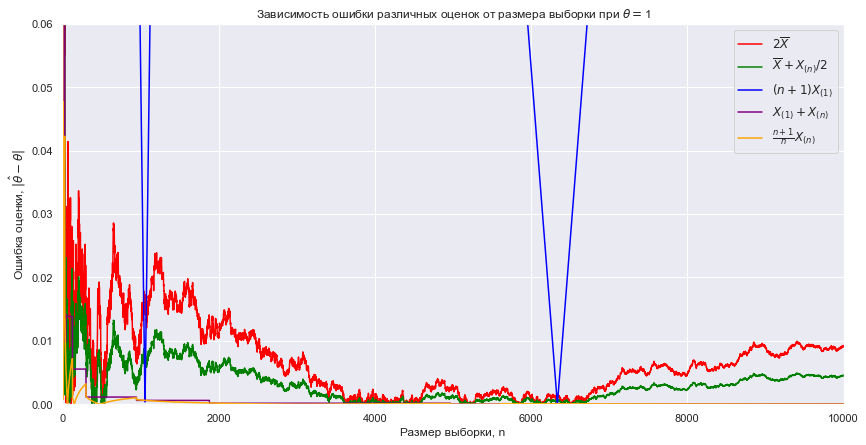

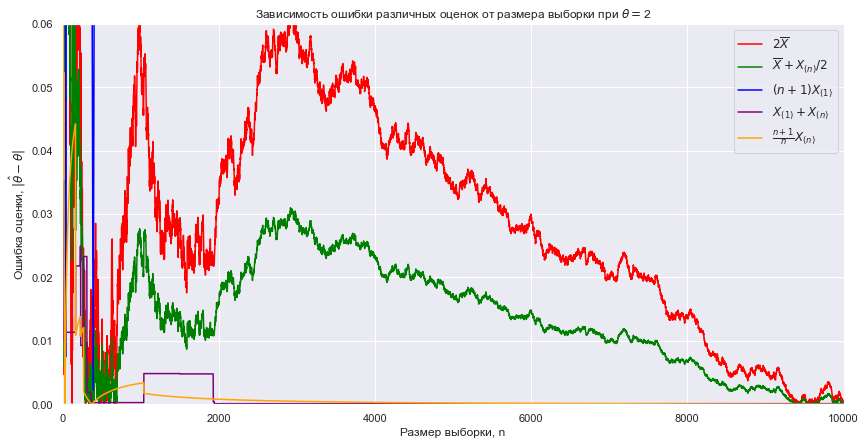

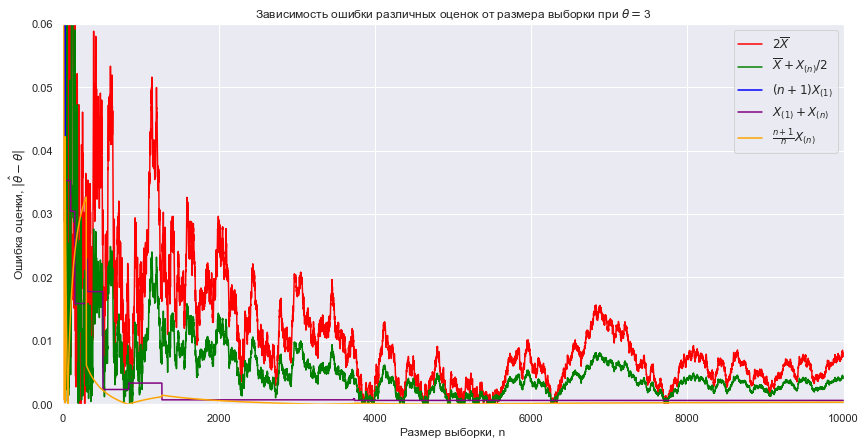

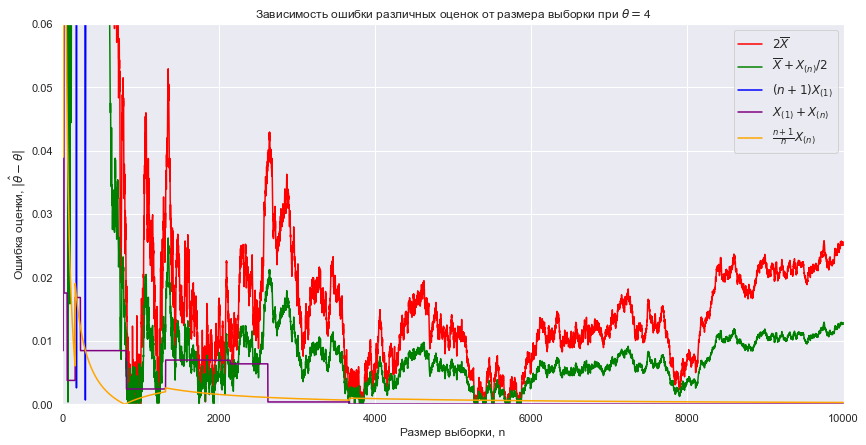

In [ ]:
for theta in range(1, 5):
    sample = sps.uniform(loc=0, scale=theta).rvs(size=int(N))
    means = 2 * (np.cumsum(sample) / np.arange(1, N + 1))
    mean_n_order =  (means + np.maximum.accumulate(sample)) / 2
    first_order = np.minimum.accumulate(sample) * np.arange(2, N + 2)
    first_n_order = np.minimum.accumulate(sample) + np.maximum.accumulate(sample)
    n_order = (np.arange(2, N + 2) / np.arange(1, N + 1)) * np.maximum.accumulate(sample)

    plt.figure(figsize=(14,7))
    plt.ylim((None, 0.06))
    plt.xlim(None, 10000)
    plt.plot(np.abs(means - theta), color='red', label=r'$2\overline{X}$')
    plt.plot(np.abs(mean_n_order - theta), color='green', label=r'$\overline{X} + X_{(n)} / 2$')
    plt.plot(np.abs(first_order - theta), color='blue', label=r'$(n+1)X_{(1)}$')
    plt.plot(np.abs(first_n_order - theta), color='purple',  label=r'$X_{(1)} + X_{(n)}$')
    plt.plot(np.abs(n_order - theta), color='orange', label=r'$\frac{n+1}{n} X_{(n)}$')
    plt.xlabel('Размер выборки, n')
    plt.ylabel(r'Ошибка оценки, $|\hat{\theta} - \theta|$')
    plt.legend(fontsize=12)
    plt.title('Зависимость ошибки различных оценок от размера выборки при ' + r'$\theta =$' + str(theta))

Сделайте вывод.
При $n = N$ наилучшей оценкой является $\frac{n+1}{n} X_{(n)}$.

__Вывод:__ оценки остаются аналогичными при различных $\theta$: лучшими являются $X_{(1)} + X_{(n)}$ и $\frac{n + 1}{n}X_{(n)}$, худшей $ - \,(n+1)X_{(1)}$.

### Задача 2

Сгенерируйте выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$. 

In [ ]:
# YOUR CODE GOES HERE
theta = 1
N = 1e4
sample = sps.expon(scale=theta).rvs(size=int(N))

Для всех $n \leqslant N$ посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$).

In [ ]:
def calculate_ev(k):
    mean = np.cumsum(sample ** k) / np.arange(1, N + 1)
    eval = (np.math.factorial(k) / mean) ** (1 / k)
    return eval

Text(0.5, 1.0, 'Зависимость ошибки oценки от размера выборки в зависимотси от параметра')

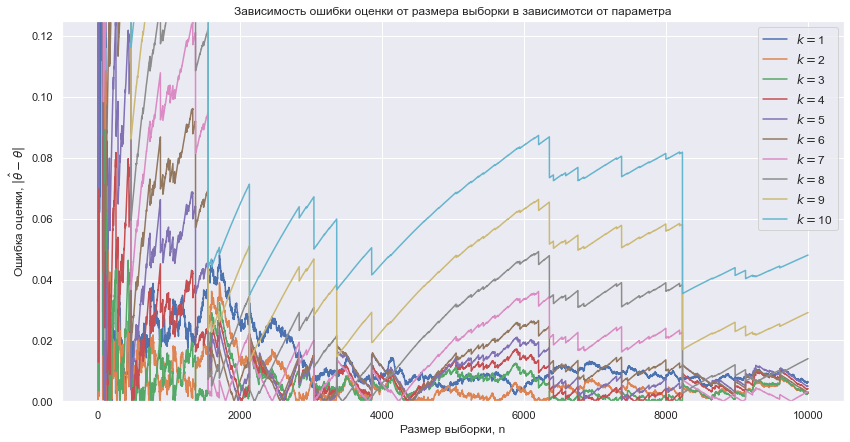

In [ ]:
plt.figure(figsize=(14,7))
plt.ylim((None, 0.125))
for i in range(10):
    evaluation = calculate_ev(i + 1)
    plt.plot(np.abs(evaluation - theta), label=r'$k =$' + str(i + 1))
plt.xlabel('Размер выборки, n')
plt.ylabel(r'Ошибка оценки, $|\hat{\theta} - \theta|$')
plt.legend(fontsize=12)
plt.title('Зависимость ошибки oценки от размера выборки в зависимотси от параметра')

Сделайте вывод.
При $n = N$ лучше всего себя ведёт оценка с параметром $k = 2$.
При различных $n$лучшей является оценка с параметром $k = 1$.

__Вывод:__ ошибка оценки $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ парметра $\theta$ меньше при маленьких значениях $k$. При увеличении $k$ увеличивается и ошибка оценки.

### Задача 3

Придумайте распределение, у которого конечны первые четыре момента, а пятый - нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$.

Рассмотрим рапределение Парето $p(x) = \frac{5}{x^6}$.

In [ ]:
# YOUR CODE GOES HERE
N = 1e4
b = 5
sample = sps.pareto(b).rvs(size=int(N))

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

Text(0.5, 1.0, 'График плотности')

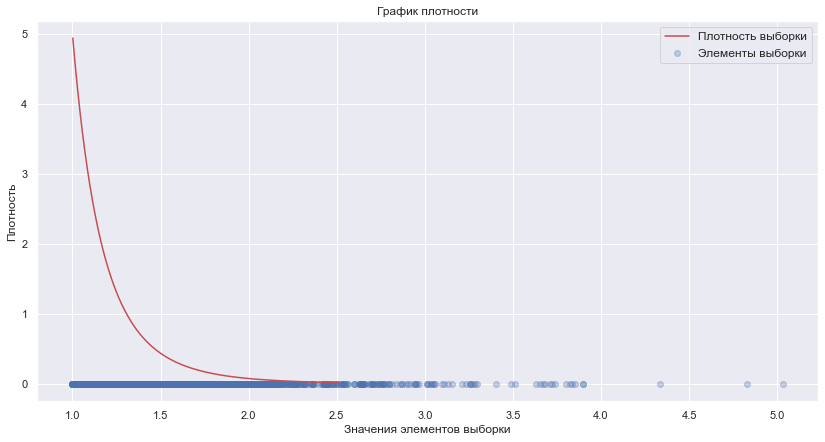

In [ ]:
# YOUR CODE GOES HERE
plt.figure(figsize=(14,7))
x = np.linspace(sps.pareto.ppf(0.01, b), sps.pareto.ppf(0.99, b), 1000)
plt.plot(x, sps.pareto(b).pdf(x), color='r', label = "Плотность выборки")
plt.scatter(sample, np.zeros(int(N)), alpha = 0.3, label = "Элементы выборки")
plt.xlabel('Значения элементов выборки')
plt.ylabel('Плотность')
plt.legend(fontsize=12)
plt.title('График плотности')

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

In [ ]:
# YOUR CODE GOES HERE
sample_var = np.zeros(int(N))
for i in range (2, int(N + 1)):
    sample_var[i - 1] = np.var(sample[:i])

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

Text(0.5, 1.0, 'Зависимость модуля разности оценки дисперсии и её истинного значения от $n$')

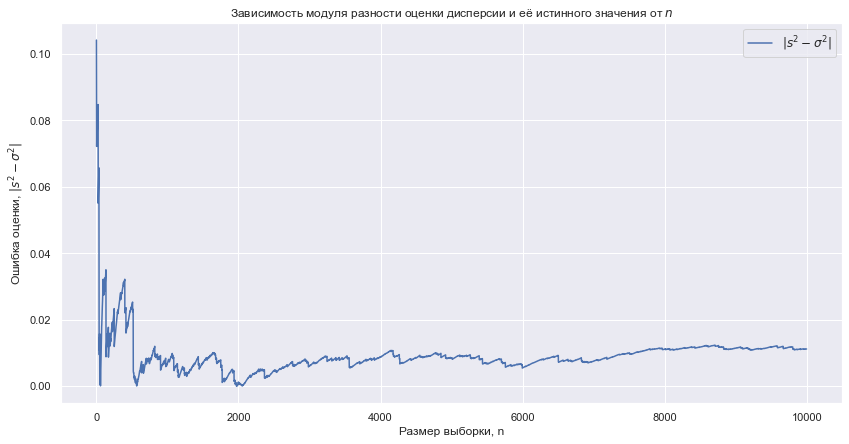

In [ ]:
# YOUR CODE GOES HERE
plt.figure(figsize=(14,7))
plt.plot(np.abs(sample_var - sps.pareto(b).var()), label=r'$|s^2 - \sigma^2|$')
plt.xlabel('Размер выборки, n')
plt.ylabel(r'Ошибка оценки, $|s^2 - \sigma^2|$')
plt.legend(fontsize=12)
plt.title(r'Зависимость модуля разности оценки дисперсии и её истинного значения от $n$')

Вывод: наибольшее значение ошибки наблюдается при размере выборки $n \approx 200$. Далее ошибка уменьшатся с увеличением $n$, что может говорить о сходимости выборочной дисперсии к её истинному значению.

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


In [ ]:
# YOUR CODE GOES HERE
N = 10e4
b = 5
sample = sps.cauchy().rvs(size=int(N))

Text(0.5, 1.0, 'График плотности')

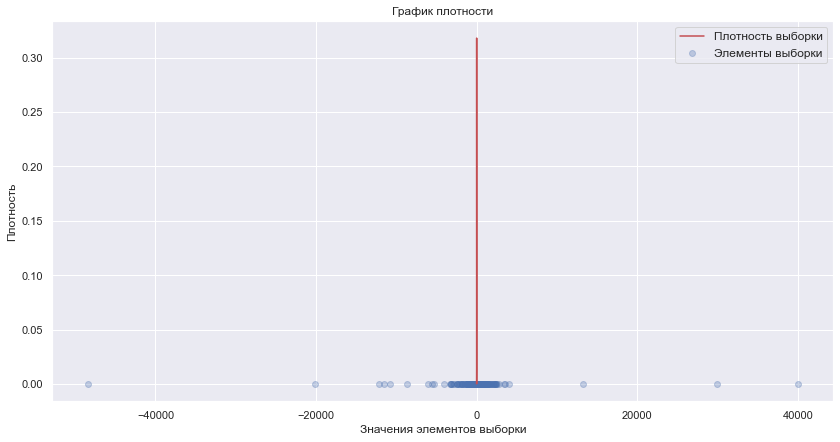

In [ ]:
plt.figure(figsize=(14,7))
x = np.linspace(sps.cauchy.ppf(0.01), sps.cauchy.ppf(0.99), 1000)
plt.plot(x, sps.cauchy.pdf(x), color='r', label = "Плотность выборки")
plt.scatter(sample, np.zeros(int(N)), alpha = 0.3, label = "Элементы выборки")
plt.xlabel('Значения элементов выборки')
plt.ylabel('Плотность')
plt.legend(fontsize=12)
plt.title('График плотности')

In [ ]:
sample_var = np.zeros(int(N))
for i in range (2, int(N + 1)):
    sample_var[i - 1] = np.var(sample[:i])

Text(0.5, 1.0, 'Зависимость оценки дисперсии от $n$')

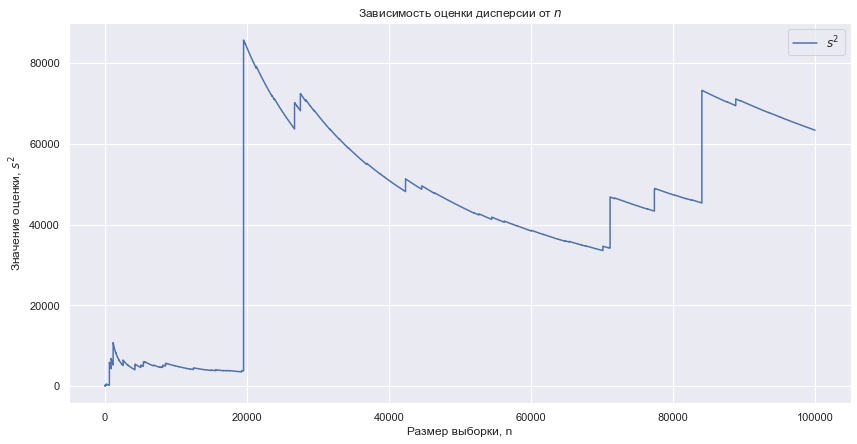

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(np.abs(sample_var), label=r'$s^2$')
plt.xlabel('Размер выборки, n')
plt.ylabel(r'Значение оценки, $s^2$')
plt.legend(fontsize=12)
plt.title(r'Зависимость оценки дисперсии от $n$')

Вывод: выборочная дисперсия не сходится, что и ожидалось для распределения Коши.

### Задача 4

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [ ]:
# YOUR CODE GOES HERE
N =1e4
sample = sps.norm(loc = 0, scale=1).rvs(size=int(N))

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary
# YOUR CODE GOES HERE

ecdf = []
for i in range(int(N)):
    ecdf.append(ECDF(sample[:(i + 1)]))

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

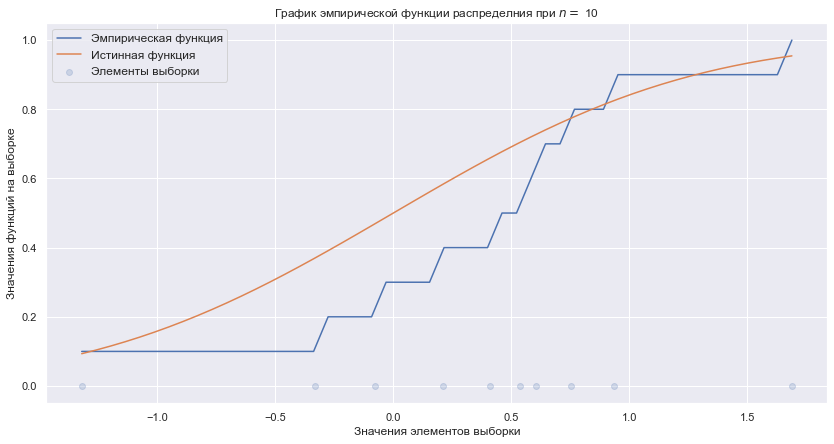

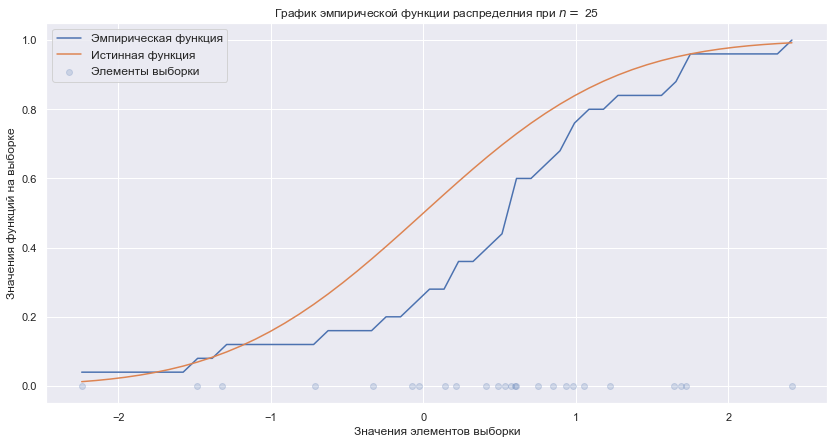

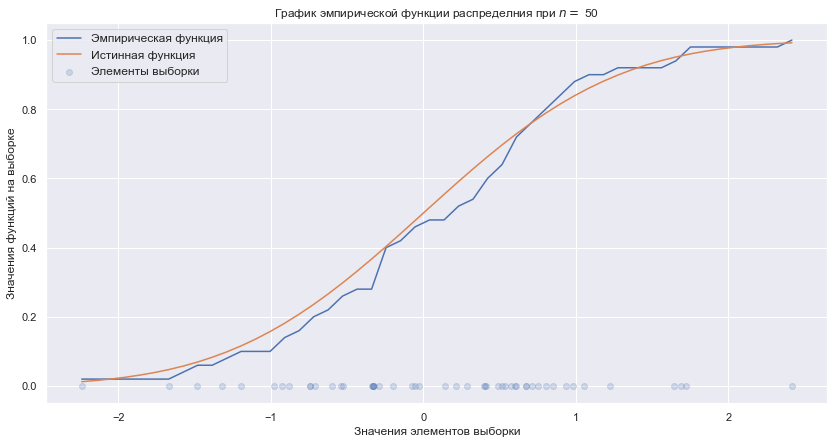

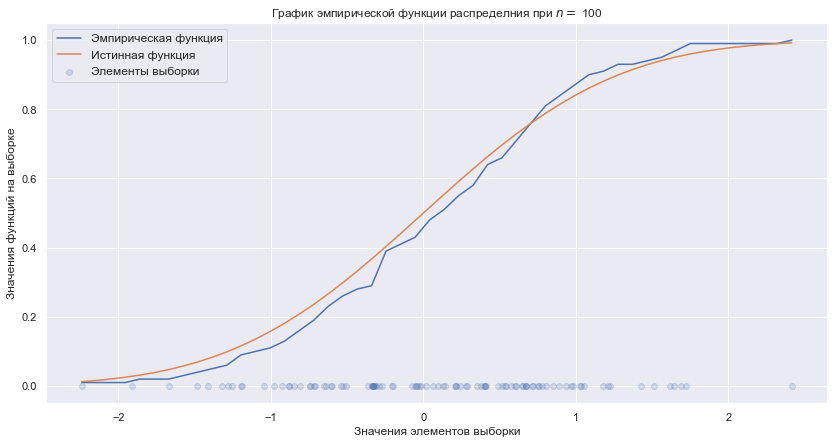

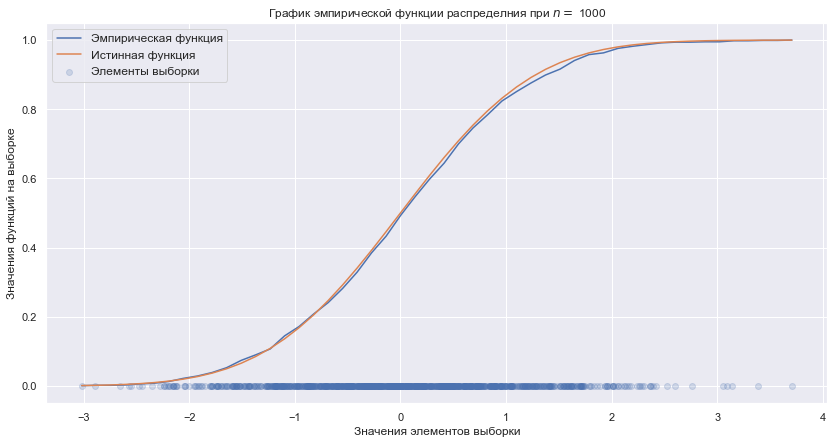

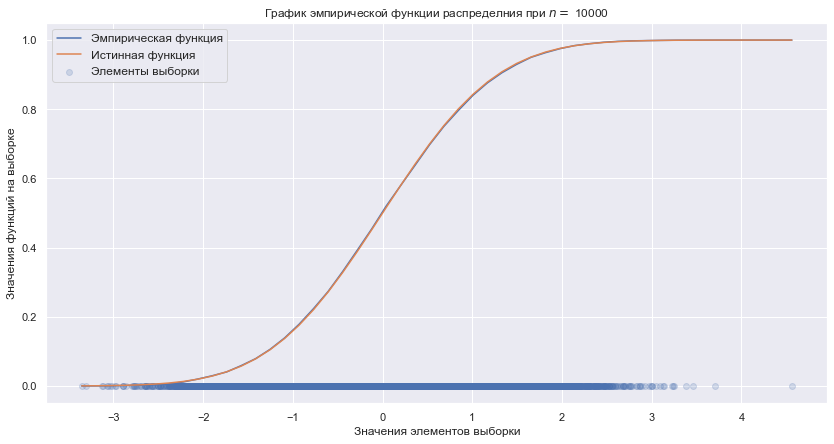

In [ ]:
# YOUR CODE GOES HERE
n = [10, 25, 50, 100, 1000, int(N)]
for i in n:
    plt.figure(figsize=(14,7))
    x = np.linspace(min(sample[:i]), max(sample[:i]))
    plt.plot(x, ecdf[i - 1](x), label = 'Эмпирическая функция')
    plt.plot(x, sps.norm(loc = 0, scale=1).cdf(x), label = 'Истинная функция')
    plt.scatter(sample[:i], np.zeros(int(i)), alpha = 0.2, label = "Элементы выборки")
    plt.legend(fontsize=12)
    plt.xlabel('Значения элементов выборки')
    plt.ylabel('Значения функций на выборке')
    plt.title(r'График эмпирической функции распределния при $n =$ ' + str(i))


Вывод: с увеличением $n$ эмипирическская функция сходится к истинной.

Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


In [ ]:
# YOUR CODE GOES HERE
D_n = np.zeros(int(N))
for i in range(int(N)):
    x = np.linspace(min(sample[:i + 1]), max(sample[:i + 1]))
    D_n[i] = (ecdf[i](x) - sps.norm(loc = 0, scale=1).cdf(x)).max()

Text(0.5, 1.0, 'Зависимости статистик от $n$')

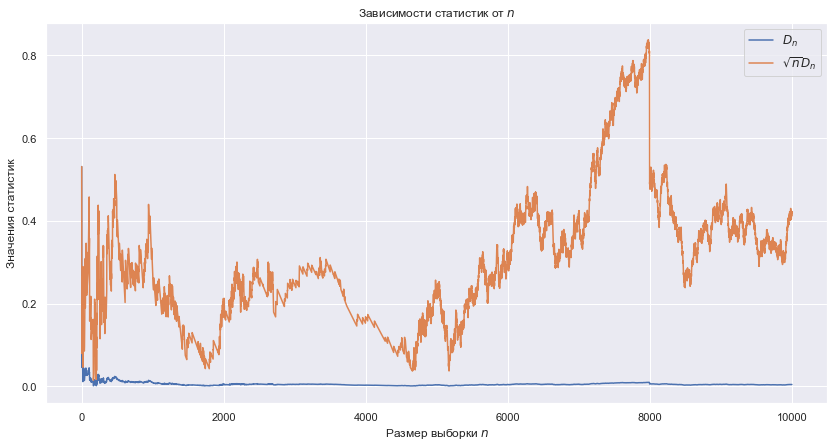

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(D_n, label = r'$D_n$')
plt.plot(D_n * (np.arange(1, N + 1) ** 0.5), label = r'$\sqrt{n}D_n$')
plt.legend(fontsize=12)
plt.xlabel(r'Размер выборки $n$')
plt.ylabel('Значения статистик')
plt.title(r'Зависимости статистик от $n$')

Вывод: при увеличении $n$ статистика $D_n$ сходится к 0, благодаря чему можно сделать вывод, что она является состоятельной, но не асимптотически нормальной, так как $\sqrt{n}D_n$ не сходится к нормальному распределению.

/Users/iu/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


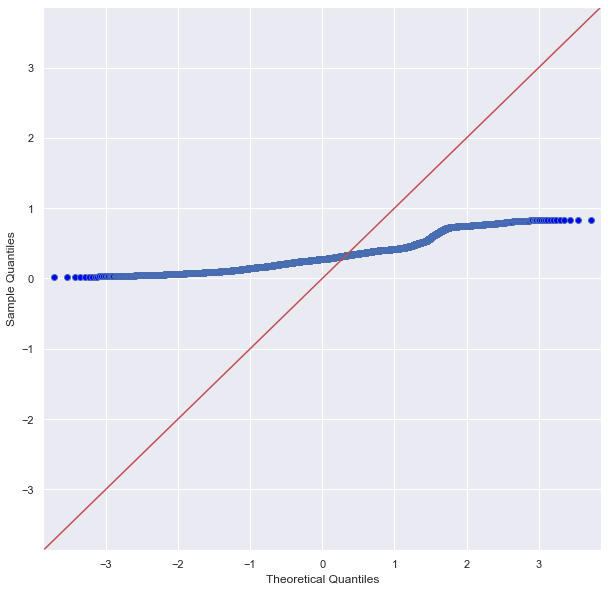

In [ ]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(10, 10))
a = D_n * (np.arange(1, N + 1) ** 0.5)
sm.qqplot(a, line='45', ax=ax)
fig.show()

### Задача 5

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [ ]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

# YOUR CODE GOES HERE
theta = 1
sample = np.zeros((N_samples, N))
for i in range(N_samples):
    sample[i] = sps.uniform(loc=0, scale=theta).rvs(size=N)

mean = 2 * (np.sum(sample, axis=1) / N)
n_order = ((N + 1) / N) * np.max(sample, axis = 1)

Text(0.5, 1.0, 'Гистограммы получившихся значений статистик')

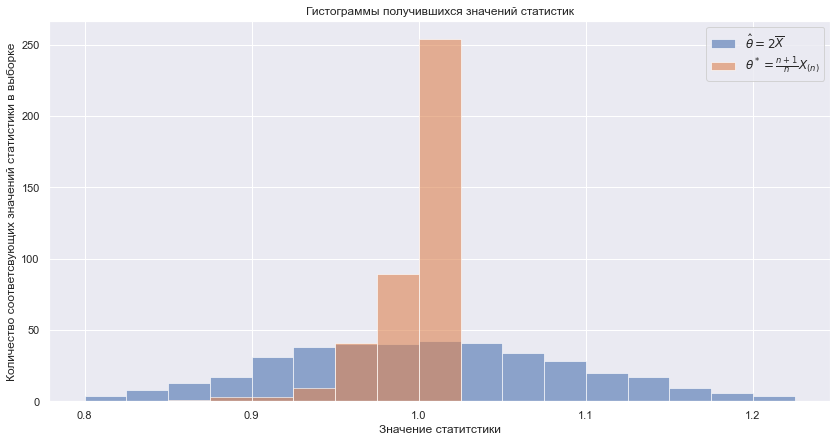

In [ ]:
plt.figure(figsize=(14,7))
plt.hist(mean, bins=bins, alpha=0.6, label= r'$\hat{\theta} = 2\overline{X}$')
plt.hist(n_order, bins=bins, alpha=0.6, label= r'$\theta^* = \frac{n+1}{n} X_{(n)}$')
plt.xlabel("Значение статитстики")
plt.ylabel("Количество соответсвующих значений статистики в выборке")
plt.legend(fontsize=12)
plt.title("Гистограммы получившихся значений статистик")

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

Text(0.5, 1.0, 'Гистограммы получившихся значений статистик')

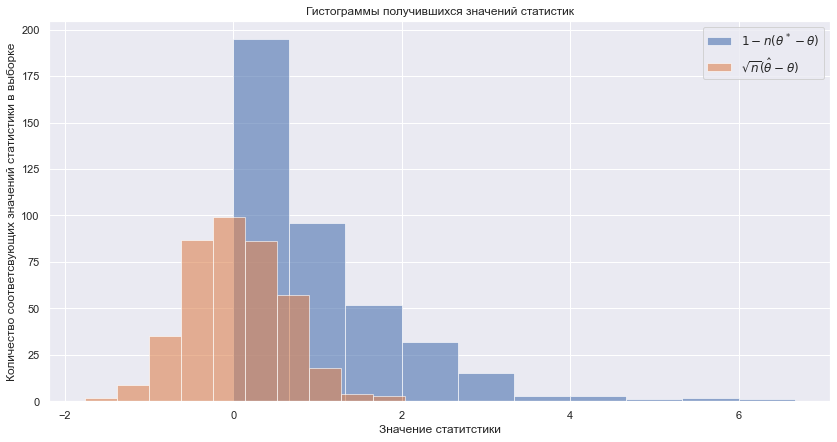

In [ ]:
# YOUR CODE GOES HERE
plt.figure(figsize=(14, 7))
plt.hist(1-N*(n_order - theta), alpha=0.6, label=r'$1 - n(\theta^* - \theta)$')
plt.hist(N ** 0.5 * (mean - theta), alpha=0.6, label=r'$\sqrt{n} (\hat\theta - \theta)$')
plt.xlabel("Значение статитстики")
plt.ylabel("Количество соответсвующих значений статистики в выборке")
plt.legend(fontsize=12)
plt.title("Гистограммы получившихся значений статистик")

На какие распределения похожи получившиеся гистограммы?

**Ответ:**
Гистограммы для $\hat{\theta}$ и $\sqrt{n} (\hat\theta - \theta)$ похожи на нормальное распределение, гистограммы для $\theta^*$ и $1 - n(\theta^* - \theta$) -- на экспоненциальное.


Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: $\sigma^2(\theta) = 4D_{\theta}X_1 = \frac{4\theta^2}{12} = \frac{\theta^2}{3}$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

/Users/iu/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


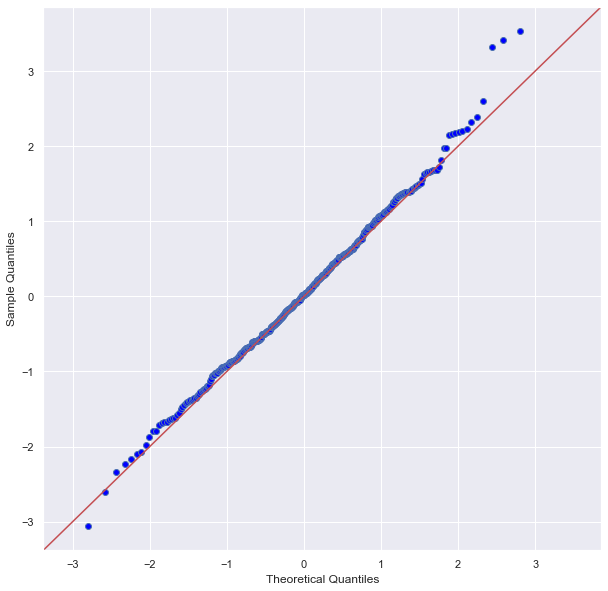

In [ ]:
import statsmodels.api as sm

sigma = (theta ** 2) / 3
theta_norm = (N ** 0.5) * (mean - theta) / (sigma ** 0.5) # YOUR CODE GOES HERE
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** да, так как точки хорошо ложатся на красную линию.

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** лучше всего подходит экспоненциальное распределние.

/Users/iu/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


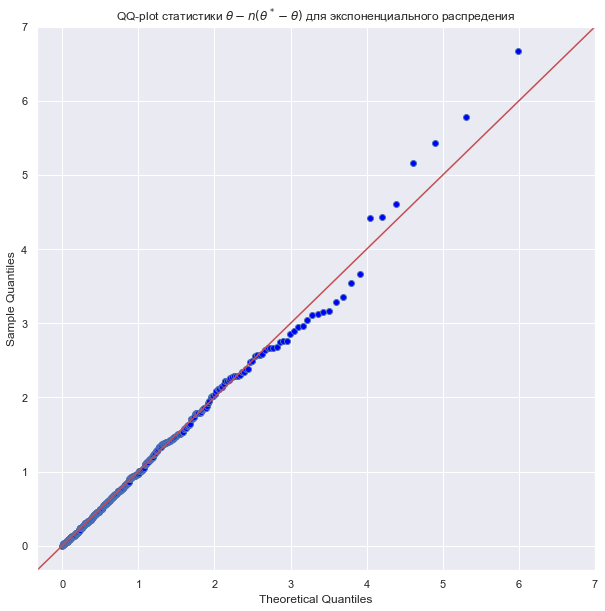

In [ ]:
# YOUR CODE GOES HERE
stats = theta - N * (n_order - theta) # YOUR CODE GOES HERE
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(stats, line='45', ax=ax, dist=sps.expon)
plt.title(r'QQ-plot статистики $\theta - n  (\theta^* - \theta)$ для экспоненциального распредения')
fig.show()

/Users/iu/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


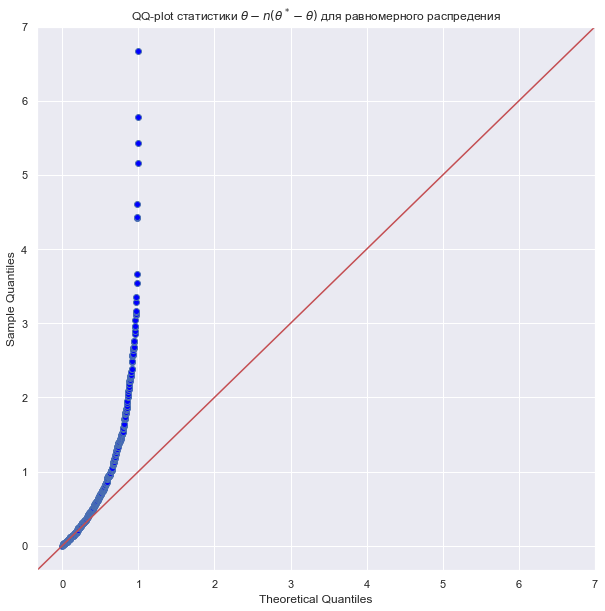

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(stats, line='45', ax=ax, dist=sps.uniform)
plt.title(r'QQ-plot статистики $\theta - n  (\theta^* - \theta)$ для равномерного распредения')
fig.show()

/Users/iu/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


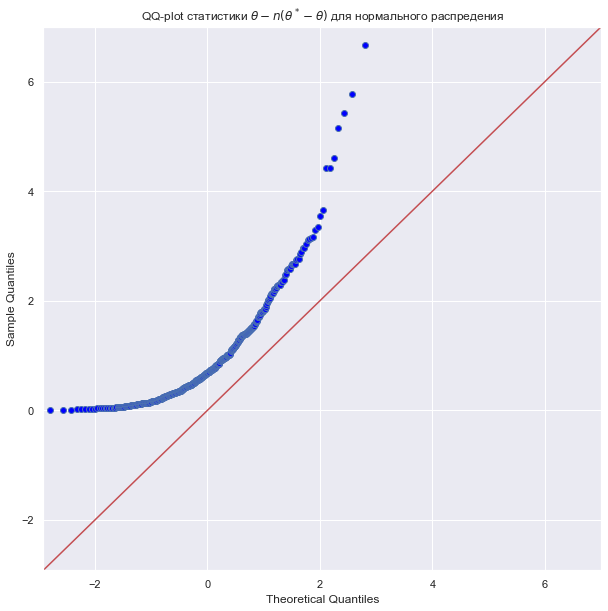

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(stats, line='45', ax=ax, dist=sps.norm)
plt.title(r'QQ-plot статистики $\theta - n  (\theta^* - \theta)$ для нормального распредения')
fig.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** нет, так как в решении это никак не использовалось.
$\theta^* = \frac{n+1}{n} X_{(n)}$ быстрее сходится, чем $\hat{\theta} = 2\overline{X}$, что было проиллюстрировано в задаче 1, поэтому $\theta^*$ «выгоднее».

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.